# Udacity - Explore Weather Trends

The goal of this notebook is to create visualizations and present information describing the similarities and differences between global temperature trends and temperature trends in San Francisco, CA.

Temperature data has been extracted from the Udacity DB and put into files specific to location domain: San Francisco and Global Temps, respectively.

Global temperature records exist back well into the 1700s, where as data from San Francisco only started in the mid 1800s.

Temperature data was originally in Celsius and will be converted to Fahrenheit with [this formula](https://www.rapidtables.com/convert/temperature/how-celsius-to-fahrenheit.html)

##### Summary

The first part of this notebook takes the raw data and make observatios against it. The second part of the notebook will convert the `avg_temp` columns of both datasets to a 7 day moving average (rolling mean) and make further observations.

I used a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) to calculate the moving averages.

I used python (pandas/jupyter/matplotlib) to analyze the data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### SF Weather Data
Data based off of average temps and the year in ascending order

In [36]:
sf_weather_data = pd.read_csv('./data/san_francisco_temps.csv')
sf_weather_data.head()

,year,avg_temp
0,1849,14.12
1,1850,13.80
2,1851,14.39
3,1852,13.81
4,1853,14.40


In [37]:
# Lets convert the avg_temp to Fahrenheit from Celsius
sf_weather_data['avg_temp'] = (sf_weather_data['avg_temp'] * 1.8 + 32)

Text(0,0.5,'Temperature (C)')

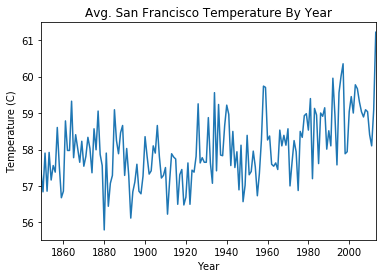

In [38]:
sf_weather_plot_data = sf_weather_data.set_index('year')
sf_weather_plot = sf_weather_plot_data.plot(title="Avg. San Francisco Temperature By Year", legend=None)
sf_weather_plot.set_xlabel('Year')
sf_weather_plot.set_ylabel('Temperature (C)')

### Global Weather Data

Data based off of average temps and the year recorded, in ascending order

In [39]:
global_weather_data = pd.read_csv('./data/global_temps.csv')
global_weather_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [40]:
# Lets convert the avg_temp to Fahrenheit from Celsius
global_weather_data['avg_temp'] = (global_weather_data['avg_temp'] * 1.8 + 32)

Text(0,0.5,'Temperature (C)')

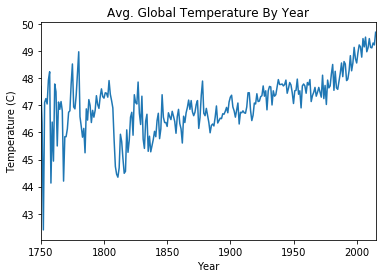

In [41]:
global_weather_plot_data = global_weather_data.set_index('year')
global_weather_plot = global_weather_plot_data.plot(title="Avg. Global Temperature By Year", legend=None)
global_weather_plot.set_xlabel('Year')
global_weather_plot.set_ylabel('Temperature (C)')

# Observations

Here we are plotting both sets of data on the same dataframe to visual see any similarities or differences in the data.

I have used [this stackoverflow on creating labels for figure with multiple plots](https://stackoverflow.com/questions/42372509/how-to-add-a-shared-x-label-and-y-label-to-a-plot-created-with-pandas-plot) which is why there is some weird padding going on

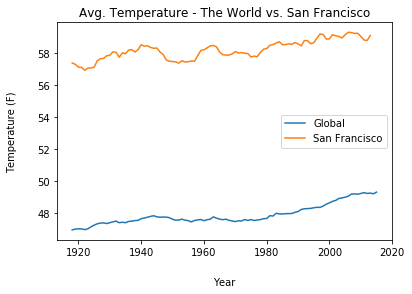

In [46]:
fig, ax = plt.subplots()

plt.plot(global_weather_plot_data)
plt.plot(sf_weather_plot_data)
    
ax.set_title('Avg. Temperature - The World vs. San Francisco')
ax.set_xlabel('Year', labelpad=20)
ax.set_ylabel('Temperature (F)', labelpad=20)
ax.legend(['Global','San Francisco'])

#### Similarities
1. Both SF and Global temperatures have been steadily rising since data has been recorded

#### Differences
1. SF average temperatures are way warmer than the global average temperature.
2. Average temperatures in SF fluctuate (change) more on a per year basis than Global average temperatures

#### Other Observations
1. Global temperatures in the beginning of the data set (1750s-1800) seem to have been more sparadic, where as time went on the temperatures appear to smooth out (lack volatility)

# Observations (with moving average)

In [47]:
global_weather_data['avg_temp'] = global_weather_data['avg_temp'].rolling(7).mean()
global_weather_data = global_weather_data[global_weather_data['year'] > 1917]
global_weather_plot_data = global_weather_data.set_index('year')

In [48]:
sf_weather_data['avg_temp'] = sf_weather_data['avg_temp'].rolling(7).mean()
sf_weather_data = sf_weather_data[sf_weather_data['year'] > 1917]
sf_weather_plot_data = sf_weather_data.set_index('year')

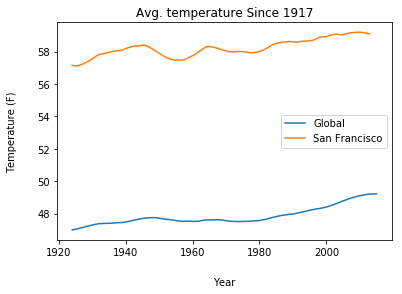

In [49]:
fig, ax = plt.subplots()

plt.plot(global_weather_plot_data)
plt.plot(sf_weather_plot_data)
    
ax.set_title('Avg. temperature Since 1917')
ax.set_xlabel('Year', labelpad=20)
ax.set_ylabel('Temperature (F)', labelpad=20)
ax.legend(['Global','San Francisco'])

#### Other Observations
1. Global temperature remained steady from the late 1930s to about the 1980s and have been on the incline since